Instalujemy bibliotekę:


In [ ]:
!pip install geopandas

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import geopandas as gpd
import zipfile, re, os
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
from urllib import request


Wczytujemy dane źródłowe 42 stron (ulubiona liczba) na stan 24.03.24r dla mieszkań na sprzedaż w Krakowie



In [ ]:
url = 'https://www.otodom.pl/pl/wyniki/sprzedaz/mieszkanie/malopolskie/krakow/krakow/krakow?viewType=listing&limit=72&page='
strony = []
for numer_strony in range(1, 42):
    req = request.Request(f'{url}{numer_strony}', headers={'User-Agent': 'Mozilla/5.0'})
    print(f'Pobieranie strony {numer_strony}')
    with request.urlopen(req) as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        strony.append(processed_page)

Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17
Pobieranie strony 18
Pobieranie strony 19
Pobieranie strony 20
Pobieranie strony 21
Pobieranie strony 22
Pobieranie strony 23
Pobieranie strony 24
Pobieranie strony 25
Pobieranie strony 26
Pobieranie strony 27
Pobieranie strony 28
Pobieranie strony 29
Pobieranie strony 30
Pobieranie strony 31
Pobieranie strony 32
Pobieranie strony 33
Pobieranie strony 34
Pobieranie strony 35
Pobieranie strony 36
Pobieranie strony 37
Pobieranie strony 38
Pobieranie strony 39
Pobieranie strony 40
Pobieranie strony 41


In [ ]:
import re

def wartosc_liczbowa(tekst):
    liczba = re.findall(r'\d+', tekst)
    return int(''.join(liczba)) if liczba else None

dane = []

for indeks, strona in enumerate(strony):
    lista_mieszkan = strona.find('div', attrs={'data-cy': 'search.listing.organic'}).find_all('li')

    for mieszkanie in lista_mieszkan:
        dane_mieszkania = {}
        try:
            informacje_o_mieszkaniu = mieszkanie.article.contents[0]
        except Exception as e:
            continue

        szczegoly_mieszkania = informacje_o_mieszkaniu.contents[-1]

        try:
            dane_mieszkania['zdjecie'] = informacje_o_mieszkaniu.contents[0].find('div', attrs={'data-testid': 'carousel-container'}).div.a.img['src']
        except Exception as e:
            dane_mieszkania['zdjecie'] = 'Brak zdjęcia'

        dane_mieszkania['tytul'] = szczegoly_mieszkania.find('a', attrs={'data-cy': 'listing-item-link'}).p.text.strip()
        dane_mieszkania['url'] = 'https://www.otodom.pl' + szczegoly_mieszkania.find('a', attrs={'data-cy': 'listing-item-link'})['href']
        dane_mieszkania['cena'] = wartosc_liczbowa(szczegoly_mieszkania.select('div')[0].span.contents[0].text.strip())

        if len(szczegoly_mieszkania.select('div')[0].span.contents) > 1:
            dane_mieszkania['cena_za_metr_kwadratowy'] = wartosc_liczbowa(szczegoly_mieszkania.select('div')[0].span.contents[1].text.strip())

        informacje = szczegoly_mieszkania.find('div', attrs={'data-testid': 'advert-card-specs-list'})
        dd_elements = informacje.find_all('dd')

        for dd in dd_elements:
            if 'pokoje' in dd.text or 'pokoi' in dd.text:
                dane_mieszkania['liczba_pokoi'] = wartosc_liczbowa(dd.get_text(strip=True)[0])
            if 'm²' in dd.text:
                dane_mieszkania['powierzchnia'] = float(re.search(r'\d+\.?\d*', dd.get_text(strip=True)).group())
            if 'piętro' in dd.text:
                dane_mieszkania['pietro'] = wartosc_liczbowa(dd.get_text(strip=True))

        dane_mieszkania['powierzchnia'] = dane_mieszkania.get('powierzchnia', 0)
        dane_mieszkania['pietro'] = dane_mieszkania.get('pietro', 0)

        dane_mieszkania['adres'] = szczegoly_mieszkania.select('div')[4].p.contents[0].text.strip()

        dane.append(dane_mieszkania)
        print(dane_mieszkania)
    print(indeks)


{'zdjecie': 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6ImYzc3dsY3YzdDd4azItQVBMIiwidyI6W3siZm4iOiJlbnZmcXFlMWF5NGsxLUFQTCIsInMiOiIxNCIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.PzdyKGPKokcvlWC3jHrBLqgA5INx5WOXNr--uM-gR-U/image;s=655x491;q=80', 'tytul': 'OLSZA | 3 osobne p. | Tramwaj | Piwnica', 'url': 'https://www.otodom.pl/pl/oferta/olsza-3-osobne-p-tramwaj-piwnica-ID4pmIR', 'cena': 595000, 'cena_za_metr_kwadratowy': 13523, 'liczba_pokoi': 3, 'powierzchnia': 44.0, 'pietro': 4, 'adres': 'ul. Bohaterów Wietnamu, Olsza, Prądnik Czerwony, Kraków, małopolskie'}
{'zdjecie': 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6IjJqN2YzZ25ha21xYjItQVBMIiwidyI6W3siZm4iOiJlbnZmcXFlMWF5NGsxLUFQTCIsInMiOiIxNCIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.m-W7GF4lO0Orm6Q5DrJ-SDmRN14wedw2A6Z88T6rV6o/image;s=655x491;q=80', 'tytul': 'Mieszkanie z komórką lokatorską i tarasem', 'url': 'https://www.otodom.pl/pl/oferta/mieszkanie-z-komorka-lokatorska-i-tarasem-ID4pO8H', 'cena': 1070000, 'cena_za_metr_kwadratowy': 1642

Wizualizacja danych w przykładowy sposób

In [ ]:
df = pd.DataFrame(dane)

df['cena'] = df['cena'].map(lambda x: '{:,.2f} zł'.format(x) if not pd.isnull(x) else 'Brak')
df['cena_za_metr_kwadratowy'] = df['cena_za_metr_kwadratowy'].map(lambda x: '{:,.2f} zł/m²'.format(x) if not pd.isnull(x) else 'Brak')
df['powierzchnia'] = df['powierzchnia'].astype(str) + ' m²'
df['tytul'] = df['tytul'].apply(lambda x: f'{x:^80}')
df['pietro'] = df['pietro'].replace(0, 'Parter')
df['liczba_pokoi'] = df['liczba_pokoi'].fillna('Brak')

df.head(50)

,zdjecie,tytul,url,cena,cena_za_metr_kwadratowy,liczba_pokoi,powierzchnia,pietro,adres
0,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,OLSZA | 3 osobne p. | Tram...,https://www.otodom.pl/pl/oferta/olsza-3-osobne...,"595,000.00 zł","13,523.00 zł/m²",3.0,44.0 m²,4,"ul. Bohaterów Wietnamu, Olsza, Prądnik Czerwon..."
1,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,Mieszkanie z komórką lokato...,https://www.otodom.pl/pl/oferta/mieszkanie-z-k...,"1,070,000.00 zł","16,429.00 zł/m²",3.0,65.13 m²,Parter,"ul. Franciszka Bohomolca, Mistrzejowice, Mistr..."
2,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,Wykończone 3 Pokoje 57 M2 Z Og...,https://www.otodom.pl/pl/oferta/wykonczone-3-p...,"999,000.00 zł","17,374.00 zł/m²",3.0,57.5 m²,Parter,"ul. Walerego Sławka, Wola Duchacka, Podgórze D..."
3,Brak zdjęcia,2 pokoje + osobna kuchnia + p...,https://www.otodom.pl/pl/oferta/2-pokoje-osobn...,"725,000.00 zł","14,414.00 zł/m²",2.0,50.3 m²,1,"Grzegórzki, Grzegórzki, Kraków, małopolskie"
4,Brak zdjęcia,Pięknie wykończone|duży balkon|...,https://www.otodom.pl/pl/oferta/pieknie-wykonc...,"859,000.00 zł","16,488.00 zł/m²",2.0,52.1 m²,4,"Bieżanów, Bieżanów-Prokocim, Kraków, małopolskie"
5,Brak zdjęcia,Na sprzedaż apartament z ogró...,https://www.otodom.pl/pl/oferta/na-sprzedaz-ap...,"791,000.00 zł","14,981.00 zł/m²",3.0,52.8 m²,Parter,"ul. Mariana Domagały, Złocień, Bieżanów-Prokoc..."
6,Brak zdjęcia,2-pokojowe mieszkanie 47...,https://www.otodom.pl/pl/oferta/2-pokojowe-mie...,Brak,Brak,2.0,47.5 m²,2,"ul. Stefana Banacha, Górka Narodowa, Prądnik B..."
7,Brak zdjęcia,"Nowoczesne 2pok,36m,balkon,MPK,...",https://www.otodom.pl/pl/oferta/nowoczesne-2po...,"640,000.00 zł","17,587.00 zł/m²",2.0,36.39 m²,3,"ul. Stefana Banacha, Górka Narodowa, Prądnik B..."
8,Brak zdjęcia,Mieszkanie z balkonem Pr...,https://www.otodom.pl/pl/oferta/mieszkanie-z-b...,"689,000.00 zł","11,113.00 zł/m²",2.0,62.0 m²,2,"ul. Zawodzie, Prądnik Biały, Prądnik Biały, Kr..."
9,Brak zdjęcia,Faktoria Młyn | mieszkanie 3...,https://www.otodom.pl/pl/oferta/faktoria-mlyn-...,"927,718.00 zł","15,319.00 zł/m²",3.0,60.56 m²,Parter,"ul. Kocmyrzowska, Bieńczyce, Bieńczyce, Kraków..."


Dodanie filtracji dla dzielnic Krakowa

In [ ]:
dzielnice_krakowa = {
    1: 'stare miasto',
    2: 'grzegórzki',
    3: 'prądnik czerwony',
    4: 'prądnik biały',
    5: 'krowodrza',
    6: 'bronowice',
    7: 'zwierzyniec',
    8: 'dębniki',
    9: 'łagiewniki-borek fałęcki',
    10: 'swoszowice',
    11: 'podgórze duchackie',
    12: 'bieżanów-prokocim',
    13: 'podgórze',
    14: 'czyżyny',
    15: 'mistrzejowice',
    16: 'bieńczyce',
    17: 'wzgórza krzesławickie',
    18: 'nowa huta'
}

def filtracja(dzielnica):
    wartosc = dzielnica.split(",")
    sprawdzenie = wartosc[-3].strip().lower()
    if sprawdzenie in dzielnice_krakowa.values():
        for key, value in dzielnice_krakowa.items():
            if value == sprawdzenie:
                return value.capitalize()

df['dzielnica'] = df['adres'].apply(filtracja)
df = df.dropna(subset=['dzielnica'])
df = df[df['dzielnica'].str.lower() != "wieliczka"]
df = df[df['dzielnica'].str.lower() != "wielka wieś"]
df = df[df['dzielnica'].str.lower() != "mogilany"]
df = df.reset_index(drop=True)

df


,zdjecie,tytul,url,cena,cena_za_metr_kwadratowy,liczba_pokoi,powierzchnia,pietro,adres,dzielnica
0,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,OLSZA | 3 osobne p. | Tram...,https://www.otodom.pl/pl/oferta/olsza-3-osobne...,"595,000.00 zł","13,523.00 zł/m²",3.0,44.0 m²,4,"ul. Bohaterów Wietnamu, Olsza, Prądnik Czerwon...",Prądnik czerwony
1,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,Mieszkanie z komórką lokato...,https://www.otodom.pl/pl/oferta/mieszkanie-z-k...,"1,070,000.00 zł","16,429.00 zł/m²",3.0,65.13 m²,Parter,"ul. Franciszka Bohomolca, Mistrzejowice, Mistr...",Mistrzejowice
2,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,Wykończone 3 Pokoje 57 M2 Z Og...,https://www.otodom.pl/pl/oferta/wykonczone-3-p...,"999,000.00 zł","17,374.00 zł/m²",3.0,57.5 m²,Parter,"ul. Walerego Sławka, Wola Duchacka, Podgórze D...",Podgórze duchackie
3,Brak zdjęcia,2 pokoje + osobna kuchnia + p...,https://www.otodom.pl/pl/oferta/2-pokoje-osobn...,"725,000.00 zł","14,414.00 zł/m²",2.0,50.3 m²,1,"Grzegórzki, Grzegórzki, Kraków, małopolskie",Grzegórzki
4,Brak zdjęcia,Pięknie wykończone|duży balkon|...,https://www.otodom.pl/pl/oferta/pieknie-wykonc...,"859,000.00 zł","16,488.00 zł/m²",2.0,52.1 m²,4,"Bieżanów, Bieżanów-Prokocim, Kraków, małopolskie",Bieżanów-prokocim
...,...,...,...,...,...,...,...,...,...,...
2701,Brak zdjęcia,3 pokoje + ogródek | Podgó...,https://www.otodom.pl/pl/oferta/3-pokoje-ogrod...,"899,000.00 zł","18,265.00 zł/m²",3.0,49.22 m²,Parter,"ul. Bagrowa, Płaszów, Podgórze, Kraków, małopo...",Podgórze
2702,Brak zdjęcia,4 pokoje + taras | Brak Pcc ...,https://www.otodom.pl/pl/oferta/4-pokoje-taras...,"1,999,000.00 zł","21,967.00 zł/m²",4.0,91.0 m²,1,"ul. Wiosenna, Chełm, Zwierzyniec, Kraków, mało...",Zwierzyniec
2703,Brak zdjęcia,piękne 3 pokoje + ogród...,https://www.otodom.pl/pl/oferta/piekne-3-pokoj...,"1,173,990.00 zł","18,061.00 zł/m²",3.0,65.0 m²,Parter,"Białoprądnicka, Prądnik Biały, Prądnik Biały, ...",Prądnik biały
2704,Brak zdjęcia,2 pokoje + balkon | wysoki ...,https://www.otodom.pl/pl/oferta/2-pokoje-balko...,"899,000.00 zł","21,405.00 zł/m²",2.0,42.0 m²,1,"ul. Na Błonie, Bronowice, Bronowice, Kraków, m...",Bronowice


Podsumowanie ilosci ogloszen dla danej dzielnicy

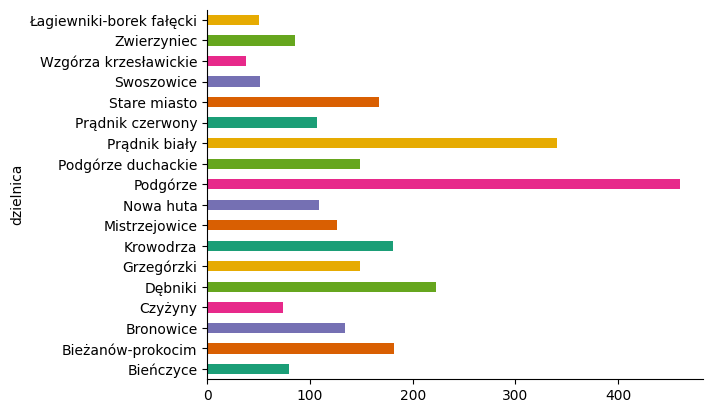

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('dzielnica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def dodaj_dzielnice(wartosc):
    if wartosc.name.lower() in dzielnice_krakowa.values():
        for key, value in dzielnice_krakowa.items():
            if value == wartosc.name.lower():
                return key

dzielnice = df.groupby('dzielnica').size().to_frame()
dzielnice.columns = ['ilosc_ogloszen']

dzielnice['numer_dzielnicy'] = dzielnice.apply(dodaj_dzielnice, axis=1)
dzielnice = dzielnice.sort_values(by='numer_dzielnicy')

dzielnice = dzielnice[['numer_dzielnicy', 'ilosc_ogloszen']]

dzielnice.head(18)


,numer_dzielnicy,ilosc_ogloszen
dzielnica,,
Stare miasto,1,167
Grzegórzki,2,149
Prądnik czerwony,3,107
Prądnik biały,4,341
Krowodrza,5,181
Bronowice,6,134
Zwierzyniec,7,85
Dębniki,8,223
Łagiewniki-borek fałęcki,9,50


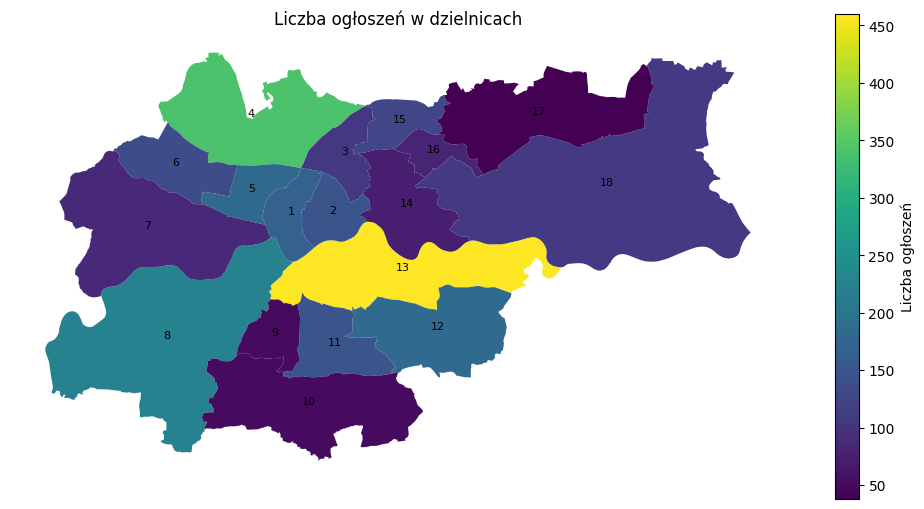

In [460]:
def czytanie_z_pliku_zip(nazwa_pliku_zip, regex_nazwy_wejsciowej):
    try:
        z = zipfile.ZipFile(nazwa_pliku_zip, mode="r")
        nazwy_dbf = [x for x in z.namelist() if re.match(regex_nazwy_wejsciowej + r'.*\.dbf$', os.path.basename(x))]
        if nazwy_dbf:
            nazwa_dbf = nazwy_dbf[0]
            z.close()
            return gpd.read_file(nazwa_dbf, encoding='utf-8', vfs='zip://'+nazwa_pliku_zip)
        else:
            z.close()
            print("Nie znaleziono pliku DBF spełniającego warunek.")
            return None
    except Exception as e:
        print("Wystąpił błąd:", e)
        return None

url = 'https://gis-support.pl/wp-content/uploads/dzielnice_Krakowa.zip'
odpowiedz = requests.get(url, allow_redirects=True)
with open('dzielnice_Krakowa.zip', 'wb') as plik:
    plik.write(odpowiedz.content)

mapa = czytanie_z_pliku_zip("dzielnice_Krakowa.zip", "dzielnice_Krakowa")
mapa = mapa.rename(columns={'nazwa': 'dzielnica'})
mapa['dzielnica'] = mapa['dzielnica'].str.capitalize()

mapa_koniec = pd.merge(mapa, dzielnice, left_on='dzielnica', right_index=True)
mapa_koniec = mapa_koniec.sort_values('ilosc_ogloszen', ascending=False)

mapa_koniec = mapa_koniec.filter(items=['dzielnica', 'ilosc_ogloszen', 'geometry'])

fig, ax = plt.subplots(figsize=(10, 10))
mapa_koniec.plot(column='ilosc_ogloszen', cmap='viridis', linewidth=1.5, ax=ax)

vmin, vmax = mapa_koniec['ilosc_ogloszen'].min(), mapa_koniec['ilosc_ogloszen'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, shrink=0.5, ax=ax, label='Liczba ogłoszeń')

for idx, row in mapa_koniec.iterrows():
    numer_dzielnicy = idx + 1
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, numer_dzielnicy, fontsize=8, ha='center')

ax.grid(True)
ax.set_axis_off()
ax.set_title("Liczba ogłoszeń w dzielnicach")
ax.set_facecolor('lightgrey')
plt.tight_layout()
plt.show()